# Global ESG and Financial Performance Analysis

## Data Collection and Preparation

### This Dataset was Downloaded From the open source Website Kaggle, it contains Data about companies important ESG Performance Fields like Market Cap, Sustainability Score, Profit Margin, Carbon Emissions and so on. This Dataset includes 1000 global companies across 9 industries and 7 regions from 2015 to 2025.
### Dataset Title: ESG & Financial Performance Dataset
### Author: Shriyash Jagtap
### Platform: Kaggle
### Link: https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset
### File Format: CSV
### File Size: Approximately 388 kB
### Last Updated: Around 3 months ago (as of mid-2025)

In [1]:
import pandas as pd
import numpy as np

## 1. Read Dataset 

In [2]:
# read and print the dataset
data = pd.read_csv("company_esg_financial_dataset.csv")
df = pd.DataFrame(data)
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


In [3]:
# get column names and their types
df.dtypes

CompanyID              int64
CompanyName           object
Industry              object
Region                object
Year                   int64
Revenue              float64
ProfitMargin         float64
MarketCap            float64
GrowthRate           float64
ESG_Overall          float64
ESG_Environmental    float64
ESG_Social           float64
ESG_Governance       float64
CarbonEmissions      float64
WaterUsage           float64
EnergyConsumption    float64
dtype: object

## 2. Clean Null Data

In [4]:
# check for null values
df.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

In [5]:
# check the GrowthRate column and get summary statistics
df['GrowthRate'].describe()

count    10000.000000
mean         4.830370
std          9.424787
min        -36.000000
25%         -1.325000
50%          4.900000
75%         11.000000
max         38.000000
Name: GrowthRate, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

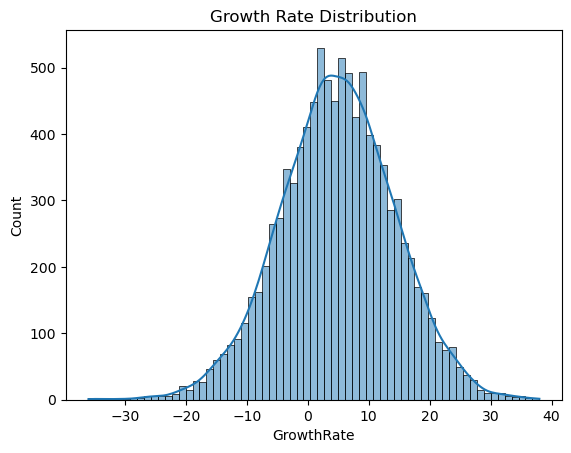

In [6]:
# check if distribution is skewed or normal to replace null values
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['GrowthRate'].dropna(), kde=True)
plt.title("Growth Rate Distribution")
plt.show

### Since the distribution is bell shaped then it is normal and we'll replace the null values with the mean

In [7]:
# replace null values with mean
df['GrowthRate'] = df['GrowthRate'].fillna(df['GrowthRate'].mean())
df.isna().sum()

CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64

In [8]:
df['GrowthRate'].describe()

count    11000.000000
mean         4.830370
std          8.986141
min        -36.000000
25%         -0.600000
50%          4.830370
75%         10.300000
max         38.000000
Name: GrowthRate, dtype: float64

In [9]:
# check for duplicated data (every company has data from 2015 to 2025 so 11 rows for each company)
company_counts=df['CompanyName'].value_counts()
company_counts

CompanyName
Company_1       11
Company_672     11
Company_659     11
Company_660     11
Company_661     11
                ..
Company_339     11
Company_340     11
Company_341     11
Company_342     11
Company_1000    11
Name: count, Length: 1000, dtype: int64

In [10]:
# check for companies who have more that 11 rows
for company_id, count in company_counts.items():
    if count > 11:
        print(f"company{company_id} has {count} rows")
    else:
        print(f"company{company_id} has 11 rows")

companyCompany_1 has 11 rows
companyCompany_672 has 11 rows
companyCompany_659 has 11 rows
companyCompany_660 has 11 rows
companyCompany_661 has 11 rows
companyCompany_662 has 11 rows
companyCompany_663 has 11 rows
companyCompany_664 has 11 rows
companyCompany_665 has 11 rows
companyCompany_666 has 11 rows
companyCompany_667 has 11 rows
companyCompany_668 has 11 rows
companyCompany_669 has 11 rows
companyCompany_670 has 11 rows
companyCompany_671 has 11 rows
companyCompany_673 has 11 rows
companyCompany_688 has 11 rows
companyCompany_674 has 11 rows
companyCompany_675 has 11 rows
companyCompany_676 has 11 rows
companyCompany_677 has 11 rows
companyCompany_678 has 11 rows
companyCompany_679 has 11 rows
companyCompany_680 has 11 rows
companyCompany_681 has 11 rows
companyCompany_682 has 11 rows
companyCompany_683 has 11 rows
companyCompany_684 has 11 rows
companyCompany_685 has 11 rows
companyCompany_686 has 11 rows
companyCompany_658 has 11 rows
companyCompany_657 has 11 rows
companyCom

## 3. Preprocessing

### Create additional derived feature for ESG Performance

In [11]:
# add new columns derived from existing columns to help in analyzing ESG performance
df['EmissionIntensity'] = df['CarbonEmissions']/df['Revenue'] 
df['EnergyEfficiency'] = df['Revenue']/df['EnergyConsumption']
df['WaterEfficiency']= df['Revenue']/df['WaterUsage']
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption,EmissionIntensity,EnergyEfficiency,WaterEfficiency
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,4.83037,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7,77.476916,0.006454,0.025814
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.20000,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4,78.756226,0.006349,0.025395
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.20000,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9,79.671446,0.006276,0.025103
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.10000,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2,76.379119,0.006546,0.026185
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.70000,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8,75.382146,0.006633,0.026531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.40000,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8,145.904247,0.001371,0.005483
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.90000,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4,143.802916,0.001391,0.005563
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.90000,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7,138.585789,0.001443,0.005773
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.80000,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3,138.637503,0.001443,0.005770


### Check for misspellings in the object data type columns

In [12]:
# check misspellings in the data
df['Industry'].value_counts()

Industry
Healthcare        1331
Transportation    1287
Manufacturing     1287
Consumer Goods    1276
Finance           1243
Energy            1188
Utilities         1177
Retail            1166
Technology        1045
Name: count, dtype: int64

In [13]:
df['Region'].value_counts()

Region
Asia             1672
Oceania          1661
Middle East      1617
Europe           1540
North America    1540
Latin America    1507
Africa           1463
Name: count, dtype: int64

In [14]:
df.to_csv('ESG_data.csv', index=False)

### Since the Dataset is now clean and empty of nulls we can proceed with EDA